In [21]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### **Data Gathering**

In [22]:
#Loading the Dataset
df = pd.read_csv('/content/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


### **Data Cleansing**

In [24]:
#Checking for Missing Values
missing_values = df.isnull().sum()
missing_values

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [25]:
#Checking for Duplicates
duplicates = df.duplicated().sum()
duplicates

0

### **Exploratory Data Analysis (EDA)**

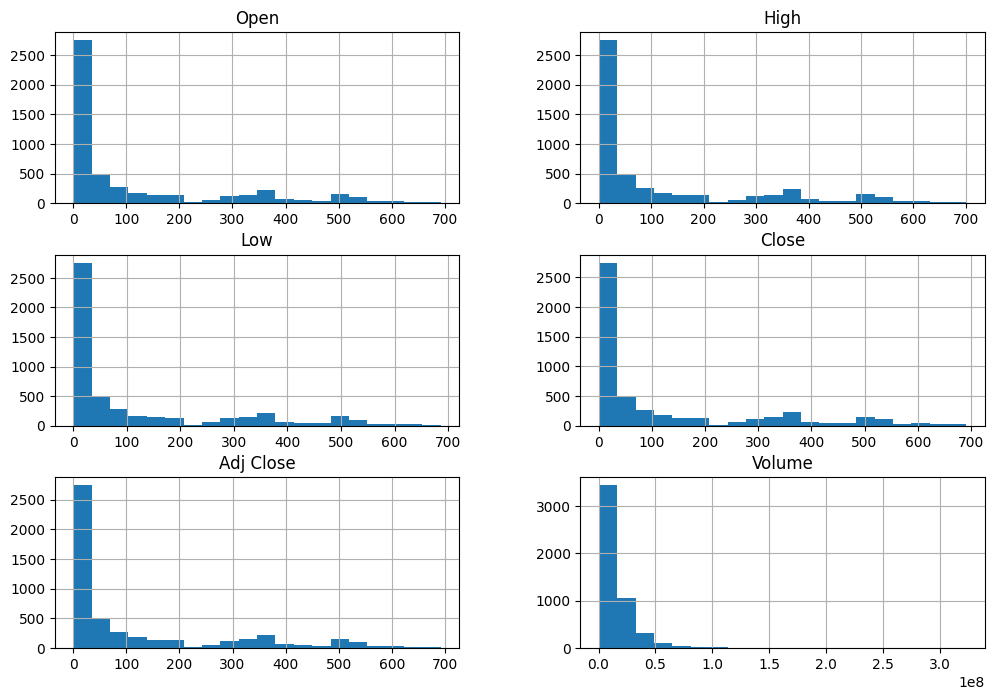

In [26]:
# Checking the distribution of numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_distribution = df[numeric_columns].hist(bins=20, figsize=(12, 8))

In [27]:
#Checking the distribution of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_distribution = df[categorical_columns].value_counts()
categorical_distribution

,count
Date,
2002-05-23,1
2015-09-28,1
2015-10-07,1
2015-10-06,1
2015-10-05,1
...,...
2009-01-26,1
2009-01-23,1
2009-01-22,1


**Data Visualization**

In [28]:
numeric_df = df.select_dtypes(include=['number'])

In [29]:
corr_matrix = numeric_df.corr()
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999863,0.999853,0.999695,0.999695,-0.262560
High,0.999863,1.000000,0.999815,0.999861,0.999861,-0.261281
Low,0.999853,0.999815,1.000000,0.999856,0.999856,-0.264033
Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548
Adj Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548
Volume,-0.262560,-0.261281,-0.264033,-0.262548,-0.262548,1.000000


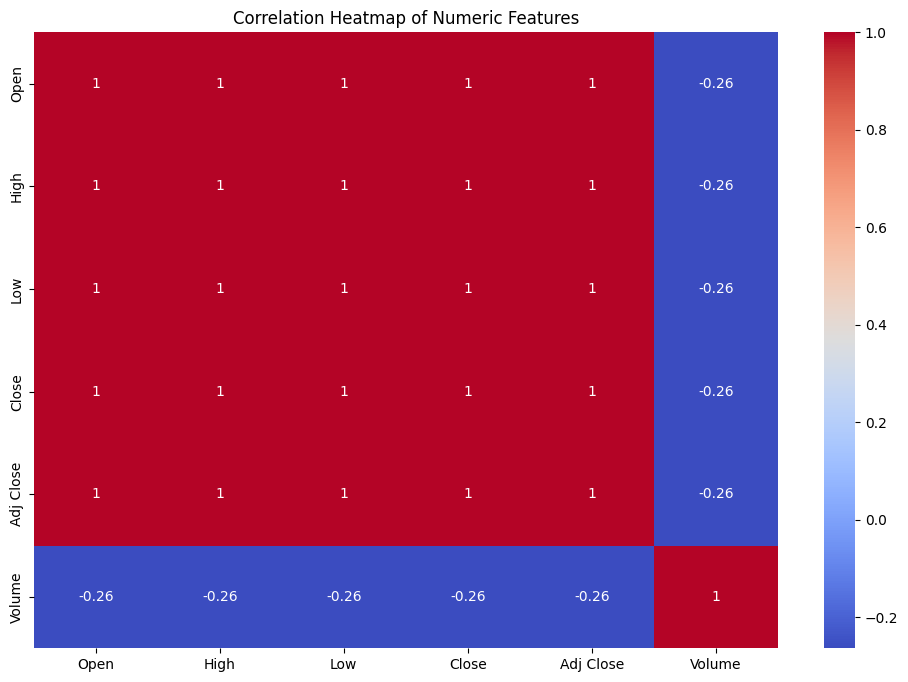

In [30]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [31]:
# Convert the 'Date' column to datetime format for time series analysis
df["Date"] = pd.to_datetime(df["Date"])

In [32]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [33]:
# --- Feature Engineering ---
# Calculate Moving Averages (e.g., 50-day, 200-day)
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

In [34]:
# Calculate daily return percentage
df['Daily_Return'] = df['Close'].pct_change()

In [35]:
# --- Volatility Analysis ---
# Calculate 30-day rolling volatility
df['Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(30)

In [36]:
# --- Calculate max_price, max_date, min_price, min_date ---
max_price = df['Close'].max()
max_date = df['Close'].idxmax()

min_price = df['Close'].min()  # Find the minimum closing price
min_date = df['Close'].idxmin() # Find the date of the minimum closing price

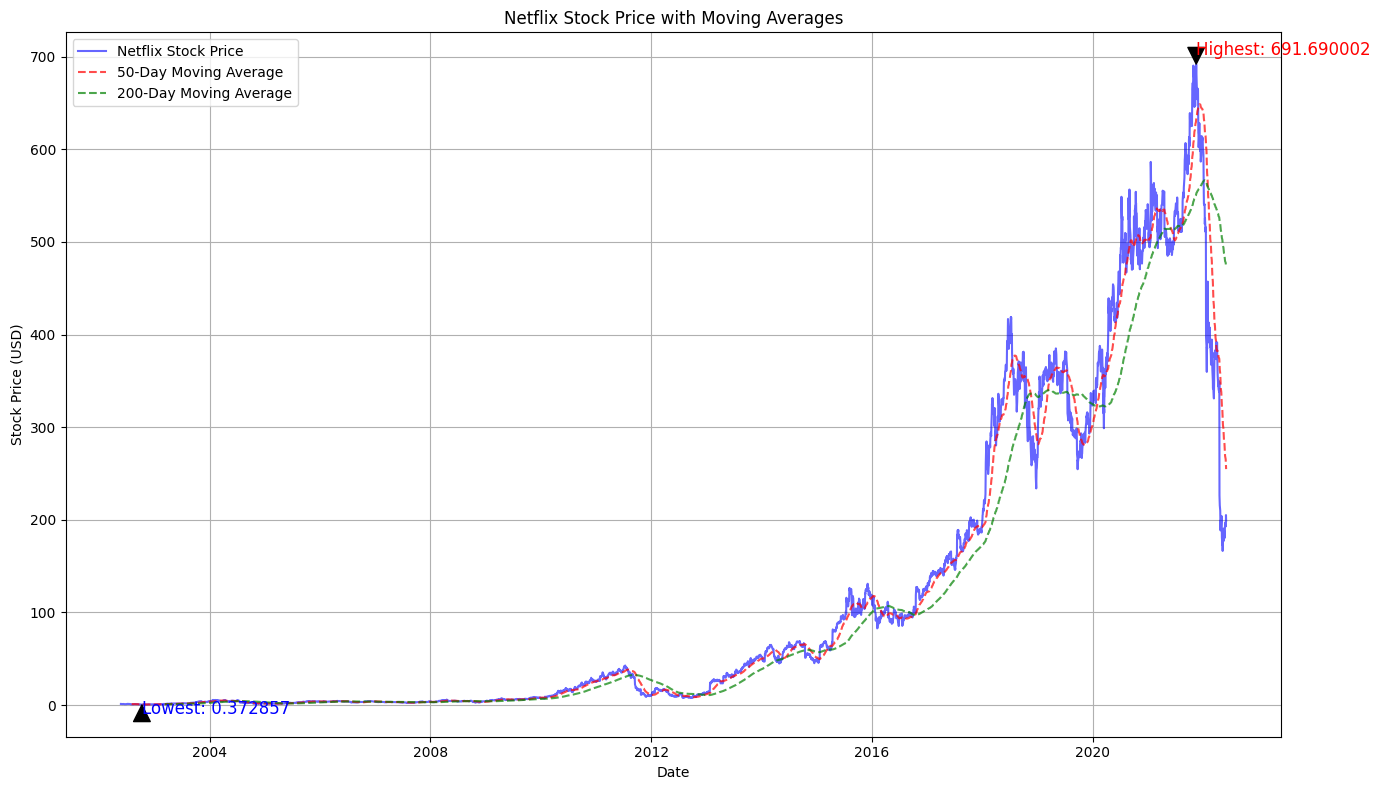

In [37]:
# Plot Netflix Stock Price, Moving Averages, and Volume
plt.figure(figsize=(14, 8))
plt.plot(df['Close'], label='Netflix Stock Price', color='blue', alpha=0.6)
plt.plot(df['50_MA'], label='50-Day Moving Average', color='red', linestyle='--', alpha=0.7)
plt.plot(df['200_MA'], label='200-Day Moving Average', color='green', linestyle='--', alpha=0.7)
plt.title('Netflix Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend(loc='upper left')
plt.annotate(f'Highest: {max_price}', xy=(max_date, max_price), xytext=(max_date, max_price + 10),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='red')

plt.annotate(f'Lowest: {min_price}', xy=(min_date, min_price), xytext=(min_date, min_price - 10),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='blue')
plt.grid(True)
plt.tight_layout()
plt.show()

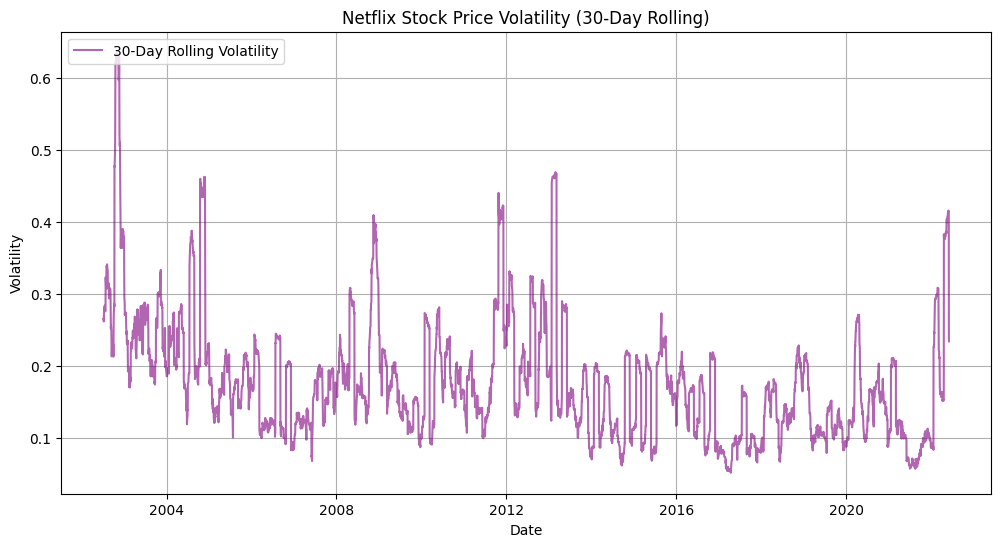

In [38]:
# Plot Netflix Stock Volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Volatility'], label='30-Day Rolling Volatility', color='purple', alpha=0.6)
plt.title('Netflix Stock Price Volatility (30-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc='upper left')
plt.grid(True)

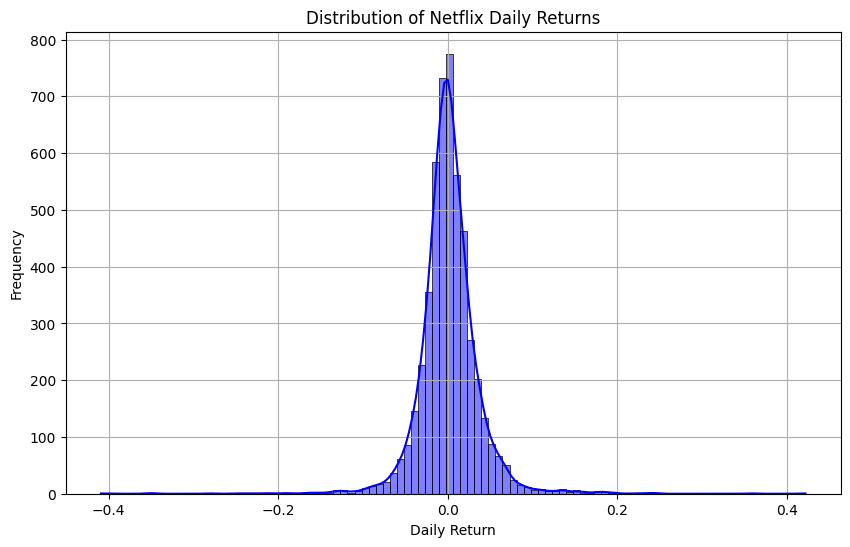

In [39]:
# Plot Netflix Daily Return Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True, color='blue')
plt.title('Distribution of Netflix Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()